# Salary estimating with national pension details from NPS
Using national pesnion details from NPS in South Korea, salary can be estimated.

## Data file download
1. Data can be downloaded from [공공데이터 포털](https://www.data.go.kr/tcs/dss/selectDataSetList.do)
2. search 국민연금공단_국민연금 가입 사업장 내역, the data is updated every month

    ### In the case of 한글깨짐
Before using csv files from 공공데이터 포털, save the files as *CSV UTF-8* format in Excel

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = (10, 7)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Load data


In [104]:
# allow to see the output on the current browser
%matplotlib inline 

# before read file with pd.read_csv, NPS file should be saved as 'CSV utf-8' format in excel window
df = pd.read_csv("data/NPS_National_Pension_subscriber_details_20201023_utf8.csv")

# df.head()
df.columns

Index(['자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영)', ' 사업장명', ' 사업자등록번호',
       ' 사업장가입상태코드 1:등록2:탈퇴', ' 우편번호', ' 사업장지번상세주소', ' 사업장도로명상세주소',
       ' 고객법정동주소코드', ' 고객행정동주소코드', ' 법정동주소광역시도코드', ' 법정동주소광역시시군구코드',
       ' 법정동주소광역시시군구읍면동코드', ' 사업장형태구분코드 1:법인2:개인', ' 사업장업종코드', ' 사업장업종코드명',
       ' 적용일자', ' 재등록일자', ' 탈퇴일자', ' 가입자수(고지인원 수 포함)',
       ' 당월고지금액(※ 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음 : 상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준))',
       ' 신규취득자수(납부재개 포함 : ※ 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영))',
       ' 상실가입자수(납부예외 포함 : ※ 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)'],
      dtype='object')

## Parse

In [105]:
columns = ['data_generate_date', 'company', 'company_id', 'subscription', 'postal_code', 'jibun_address', 'streetname_address', 'legal_address_code', 
           'admninstrative_address', 'metropolitan_code', 'city_code', 'eupmyeondong_code', 'corporatORprivate', 'sector_code', 'sector_name', 
           'effective_date', 'reRegistration_date', 'secession_date', 'number_of_subscribers', 'noted_amount', 'new', 'loss',
          ]

In [106]:
len(df.columns)

22

In [107]:
len(columns)

22

In [108]:
df.columns = columns
df.head()

,data_generate_date,company,company_id,subscription,postal_code,jibun_address,streetname_address,legal_address_code,admninstrative_address,metropolitan_code,...,corporatORprivate,sector_code,sector_name,effective_date,reRegistration_date,secession_date,number_of_subscribers,noted_amount,new,loss
0,Sep-20,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,...,1,292201,동력식 수지 공구 제조업,1988-01-01,NaN,NaN,5,792720,0,0
1,Sep-20,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,...,1,701700,화장터 운영 묘지 분양 및 관리업,1988-01-01,NaN,NaN,14,3566460,1,0
2,Sep-20,노들새마을금고,108820,1,6923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,...,1,659202,신용조합,1988-01-01,NaN,NaN,13,4408620,0,0
3,Sep-20,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,...,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,1988-01-01,NaN,NaN,28,5575460,0,1
4,Sep-20,희성전자(주),106810,1,4410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,491,207015760,0,7


### Reduce the data size from df to df_main

In [158]:
# df_main
# company: 사업장명'  
# number_of_subscribers: '가입자수'  
# new: '신규'  
# loss: '상실'  
# noted_amount: '고지금액
    
df_main = df[['company', 'number_of_subscribers', 'new', 'loss', 'noted_amount']]
df_main.head()

,company,number_of_subscribers,new,loss,noted_amount
0,우성기전(주),5,0,0,792720
1,서능공원묘지운영회(재),14,1,0,3566460
2,노들새마을금고,13,0,0,4408620
3,유창성업(주),28,0,1,5575460
4,희성전자(주),491,0,7,207015760


#### Remove (주), 주식회사 from company name

In [246]:
import re

pattern1 = '\(주\)'
pattern2 = '\(주\) '
pattern3 = '주식회사 '

# re.sub(pattern1,'','회사(주)')
# re.sub(pattern2,'','(주) 회사')

def company_name_parse(company):
    company = re.sub(pattern1, '', company)
    company = re.sub(pattern2, '', company)
    company = re.sub(pattern3, '', company)
    return company

df_main['company'] = df_main['company'].apply(company_name_parse)

In [247]:
df_main['new'].mean()

1.029088832820228

In [248]:
df_main['loss'].mean()

0.5906151863768586

In [249]:
df_main['number_of_subscribers'].mean()

19.7560434557842

In [250]:
df_main['noted_amount'].mean()

5680702.493152165

In [251]:
df_main['noted_amount_per_person'] = df_main['noted_amount'] / df_main['number_of_subscribers']

df['noted_amount_per_person'] = df['noted_amount'] / df['number_of_subscribers']
df_main['noted_amount_per_person'].head()

0   158544.00
1   254747.14
2   339124.62
3   199123.57
4   421620.69
Name: noted_amount_per_person, dtype: float64

### National Pension?
national pension insurance = 9% of personal salary  
9% = 4.5% company support + 4.5% personal insurance

In [252]:
# mean salary per month = NP per a person / 9%

df_main['mean_salary_per_month'] = df_main['noted_amount_per_person'] / 9 * 100
df['mean_salary_per_month'] = df['noted_amount_per_person'] / 9 * 100

# mean salary per year = mean salary per month *12

df_main['mean_salary_per_year'] = df_main['mean_salary_per_month'] * 12
df['mean_salary_per_year'] = df['mean_salary_per_month'] * 12

df_main.head()

,company,number_of_subscribers,new,loss,noted_amount,noted_amount_per_person,mean_salary_per_month,mean_salary_per_year,newlossRate
0,우성기전,5,0,0,792720,158544.00,1761600.00,21139200.00,nan
1,서능공원묘지운영회(재),14,1,0,3566460,254747.14,2830523.81,33966285.71,inf
2,노들새마을금고,13,0,0,4408620,339124.62,3768051.28,45216615.38,nan
3,유창성업,28,0,1,5575460,199123.57,2212484.13,26549809.52,0.00
4,희성전자,491,0,7,207015760,421620.69,4684674.36,56216092.33,0.00


In [253]:
# Number of company mean salary per month calculated
df_main['mean_salary_per_month'].notnull().sum()

495116

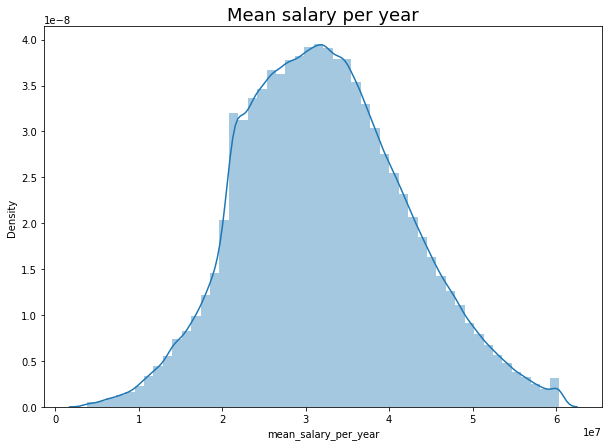

In [254]:
plt.figure(figsize = (10,7))
sns.distplot(df_main.loc[df_main['mean_salary_per_year'].notnull(), 'mean_salary_per_year'])
plt.title('Mean salary per year', fontsize=18)
plt.show()

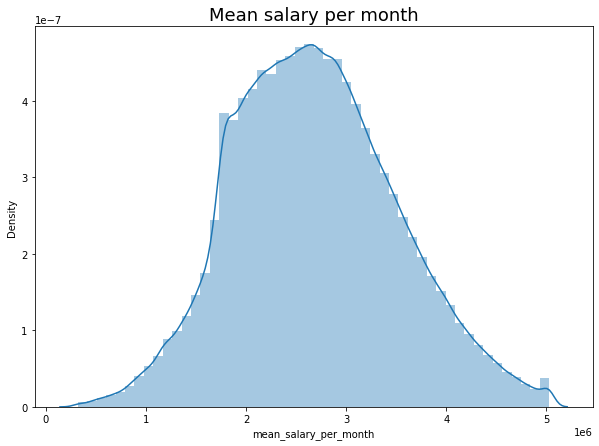

In [255]:
plt.figure(figsize=(10, 7))
sns.distplot(df_main.loc[df_main['mean_salary_per_month'].notnull(), 'mean_salary_per_month'])
plt.title('Mean salary per month', fontsize=18)
plt.show()

### 가입자수 많은 Top 20

In [256]:
df_main.sort_values(by = 'number_of_subscribers', ascending = False).head(20)

,company,number_of_subscribers,new,loss,noted_amount,noted_amount_per_person,mean_salary_per_month,mean_salary_per_year,newlossRate
4627,삼성전자,104723,2165,327,46376183460,442846.21,4920513.42,59046161.09,6.62
3581,현대자동차,68242,337,247,29998574060,439591.07,4884345.26,58612143.18,1.36
14854,엘지전자,40500,519,298,17485749920,431746.91,4797187.91,57566254.88,1.74
154264,에스케이하이닉스,28129,157,124,12401530840,440880.62,4898673.51,58784082.10,1.27
203243,이마트,27339,575,417,6762999380,247375.52,2748616.90,32983402.86,1.38
171167,엘지디스플레이,26588,61,70,11103198280,417601.86,4640020.68,55680248.13,0.87
3523,한국전력공사,22932,569,112,9485658960,413642.90,4596032.21,55152386.53,5.08
219729,삼성디스플레이,22899,113,131,10066613540,439609.31,4884547.86,58614574.38,0.86
3474,케이티,22409,29,103,9906829340,442091.54,4912128.23,58945538.79,0.28
6555,홈플러스,21109,93,193,4819080280,228295.05,2536611.70,30439340.44,0.48


### 신규채용 Top 20

In [257]:
df_main.sort_values(by = 'new', ascending = False).head(20)

,company,number_of_subscribers,new,loss,noted_amount,noted_amount_per_person,mean_salary_per_month,mean_salary_per_year,newlossRate
409115,쿠팡풀필먼트서비스 유한회사,11395,4662,4152,563940400,49490.16,549890.69,6598688.31,1.12
515447,한국환경공단/재활용품 품질개선 지원사업,3201,3201,288,229498020,71695.73,796619.18,9559430.18,11.11
3974,국민건강보험공단,19323,3007,250,6434780480,333011.46,3700127.36,44401528.27,12.03
400423,중앙경찰학교(신임),2819,2819,3,333628020,118349.78,1314997.52,15779970.20,939.67
251806,쿠팡,16323,2260,1023,4500765600,275731.52,3063683.55,36764202.66,2.21
510400,전주시청-창업일자리팀(2020년 희망일자리사업),2263,2221,401,283548120,125297.45,1392193.84,16706326.12,5.54
4627,삼성전자,104723,2165,327,46376183460,442846.21,4920513.42,59046161.09,6.62
509027,부천시청 2020년 희망일자리사업,2121,2101,69,250839000,118264.50,1314049.98,15768599.72,30.45
47101,한국과학기술정보연구원,2298,1740,90,578128020,251578.77,2795319.70,33543836.38,19.33
512517,달서구청/코로나19희망일자리,1696,1696,71,190724780,112455.65,1249507.21,14994086.48,23.89


### 퇴사 top 20

In [258]:
df_main.sort_values(by = 'loss', ascending = False).head(20)

,company,number_of_subscribers,new,loss,noted_amount,noted_amount_per_person,mean_salary_per_month,mean_salary_per_year,newlossRate
409115,쿠팡풀필먼트서비스 유한회사,11395,4662,4152,563940400,49490.16,549890.69,6598688.31,1.12
47154,한국맥도날드유한회사(A),9070,1271,1233,879824600,97003.81,1077820.16,12933841.97,1.03
251806,쿠팡,16323,2260,1023,4500765600,275731.52,3063683.55,36764202.66,2.21
438817,이랜드이츠 압구정지점,4055,254,977,601564520,148351.30,1648347.77,19780173.28,0.26
39180,씨아이로지스,906,94,899,77380140,85408.54,948983.81,11387805.74,0.10
337477,쿠팡풀필먼트서비스 유한회사,15453,1375,842,3096048840,200352.61,2226140.08,26713680.97,1.63
455427,씨제이올리브영-비정규,3279,780,787,297951320,90866.52,1009628.00,12115536.04,0.99
9877,CJ푸드빌,1322,263,718,151552020,114638.44,1273760.46,15285125.57,0.37
90215,CJ CGV,1099,456,710,94843420,86299.75,958886.06,11506632.70,0.64
234359,비케이알(버거킹),4108,728,675,402567780,97996.05,1088845.02,13066140.21,1.08


In [287]:
# def find_company(company):
    
#     matches = []
#     for match in df_main['company']:
#         if company in match:
#             matches.append(match)
    
#     if len(matches) == 1:
#         print(df_main[df_main['company']== company]['company'].values)
#         print('정규직 사원: ', df_main[df_main['company']== company]['number_of_subscribers'].values)
#         print('신입: ', df_main[df_main['company']== company]['new'].values)
#         print('퇴사: ', df_main[df_main['company']== company]['loss'].values)
#         print('평균 연봉: ', df_main[df_main['company']== company]['mean_salary_per_year'].values)
#     else:
#         print("아래의 이름중 정확한 이름으로 검색하세요")
#         print(matches)
    
    
# find_company('삼성전자')
# find_company('제이엘케이')